In [1]:
from astropy.table import Table, Column, Row, MaskedColumn
import random
import time
from datetime import date
import calendar
import numpy as np
import matplotlib.pyplot as plt

**Weather**

First create a function to generate weaher bands for each night

In [2]:
def night_weather(d,m):
    """
    produces an array of weather bands for a
    number of LAP nights in a month 
    Also produces:
    i) the expected % of band 1-closed nights #### NOT YET
    ii) the model % of band 1-closed nights #### NOT YET
    must be provided numberofdays (d) & month (m) 
    
    """

    # Read in weather stats table 
    # it is probably is too basic a model but it is adequate for now, 
    # for now I can get a feel for scatter based on runnign the "dry" and "wet" tables

    wdata = Table.read('data/weather-average.csv', format='csv')
#     wdata = Table.read('data/weather-average-dry.csv', format='csv')
#     wdata = Table.read('weather-average-wet.csv', format='csv')

    Band6Percentage = Column(100-wdata['Band1Percentage']-wdata['Band2Percentage']-wdata['Band3Percentage']-wdata['Band4Percentage']-wdata['Band5Percentage'], name='Band6Percentage', format='.1f')
    wdata.add_column(Band6Percentage)

    # create dictionary for easy table access - months are not month values but rather positions in the table

    dict = {'February': 0, 'March': 1, 'April': 2, 'May': 3, 'June': 4, 'July': 5, 'August': 6, 'September': 7, 'October': 8, 'November': 9, 'December': 10, 'January': 11}
    
    b1nights = round(d*wdata['Band1Percentage'][dict[m]]/100)
    b2nights = round(d*wdata['Band2Percentage'][dict[m]]/100)
    b3nights = round(d*wdata['Band3Percentage'][dict[m]]/100)
    b4nights = round(d*wdata['Band4Percentage'][dict[m]]/100)
    b5nights = round(d*wdata['Band5Percentage'][dict[m]]/100)
    b6nights = round(d*wdata['Band6Percentage'][dict[m]]/100)

    sdatabanddata  = []

    for i in range(d):
        if 0 <= i < b1nights:
            sdatabanddata.append(1)
        if b1nights <= i < (b1nights+b2nights):
            sdatabanddata.append(2)
        if (b1nights+b2nights) <= i < (b1nights+b2nights+b3nights):
            sdatabanddata.append(3)
        if (b1nights+b2nights+b3nights) <= i < (b1nights+b2nights+b3nights+b4nights):
            sdatabanddata.append(4)
        if (b1nights+b2nights+b3nights+b4nights) <= i < (b1nights+b2nights+b3nights+b4nights+b5nights):
            sdatabanddata.append(5)
        if (b1nights+b2nights+b3nights+b4nights+b5nights) <= i:
            sdatabanddata.append(6)

    #print (sdatabanddata,type(sdatabanddata))
    rsdatabanddata = random.sample(sdatabanddata, len(sdatabanddata)) 
    #print (rsdatabanddata,type(rsdatabanddata))
    
    modelband1frac = sdatabanddata.count(1)/d
    modelband2frac = sdatabanddata.count(2)/d
    modelband3frac = sdatabanddata.count(3)/d
    modelband4frac = sdatabanddata.count(4)/d
    modelband5frac = sdatabanddata.count(5)/d
    modelband6frac = sdatabanddata.count(6)/d
    
    
    predictedbanddata = [wdata['Band1Percentage'][dict[month]],wdata['Band2Percentage'][dict[month]],wdata['Band3Percentage'][dict[month]],wdata['Band4Percentage'][dict[month]],wdata['Band5Percentage'][dict[month]],wdata['Band6Percentage'][dict[month]]]
    
    modelpredictedbanddata = [modelband1frac*100,modelband2frac*100,modelband3frac*100,modelband4frac*100,modelband5frac*100,modelband6frac*100]
    
    return rsdatabanddata,modelpredictedbanddata,predictedbanddata


**Schedule**

Load in my schedule file 

In [3]:
# sdata = Table.read('data/18A_schedule.csv', format='csv') # schedule data - 18A
sdata = Table.read('data/17B_schedule.csv', format='csv') # schedule data - 17B

yearForTable = Column([int(x/10000) for x in sdata['Date']], name='Year')
monthForTable = Column([calendar.month_name[ int(int(x-((int(x/10000))*10000))/100)] for x in sdata['Date']], name='Month')
dayForTable = Column([x - (int(x/100)*100) for x in sdata['Date']], name='Day')

sdata.add_column(yearForTable)
sdata.add_column(monthForTable)
sdata.add_column(dayForTable)

#sdata

Obtaines data when not PI time (PI in this example = UH and DDT and E&C)

In [4]:
PIdata =  sdata[sdata['Priority1']=='PI'] 
NotPI = sdata[sdata['Priority1']!='PI'] 
LAPsdata = NotPI[NotPI['Priority1']!='CLOSED']
#print (LAPsdata)

In [5]:
# TEST Method::::
# trying to get 'February','March' automatically

# monthgroupstable = sdata.group_by('Month') # group_by method.
# monthstoexamine = len(monthgroupstable.groups.keys)
# print (monthgroupstable.groups.keys) #alphabetically ordered! huh - not ideal

# for x in range(0,monthstoexamine,1):
#     print (x)
#     print (monthgroupstable.groups.keys[x])


Examining 14 nights alloacted in November 

allocated weather bands on each night : [3, 6, 2, 5, 4, 3, 1, 6, 3, 5, 4, 2, 4, 2]

  Date   Priority1 Priority2 Year  Month   Day Weather
-------- --------- --------- ---- -------- --- -------
20171101  M16AL004  M17BL011 2017 November   1       3
20171102  M16AL004  M17BL011 2017 November   2       6
20171103  M16AL004  M17BL011 2017 November   3       2
20171104  M16AL004  M17BL011 2017 November   4       5
20171105  M17BL002        -- 2017 November   5       4
20171106  M17BL002        -- 2017 November   6       3
20171107  M17BL002        -- 2017 November   7       1
20171108  M17BL002        -- 2017 November   8       6
20171109  M17BL002        -- 2017 November   9       3
20171121  M16AL006  M17BL009 2017 November  21       5
20171122  M16AL006  M17BL009 2017 November  22       4
20171123  M16AL006  M17BL009 2017 November  23       2
20171124  M16AL006  M17BL009 2017 November  24       4
20171125  M16AL006  M17BL009 2017 November  25

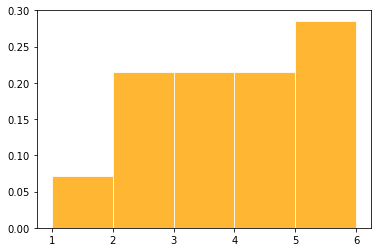

from existing data: fraction of nights Band 1=5.7%, 2=23.3%, 3=19.9%, 4=23.7% 5=10.9% and closed 16.5%

used in this program: fraction of nights Band 1=7.1%, 2=21.4%, 3=21.4%, 4=21.4% 5=14.3% and closed 14.3%



In [9]:
# CURRENT Method:::::
# for now only look at one month

allmodelpredictedbanddata = []
allpredictedbanddata = []

#monthlist = ('February','March','April','May','June','July') # I want to generate this automatically 
monthlist = ('November',) # even if running one month include , 
for x in monthlist:
    month = x#'February'#'February'
    MonthLAPSdata = LAPsdata[LAPsdata['Month']==month] #### here is when we seperate by month....
    numberofdays = (len(MonthLAPSdata))
    print ("\nExamining {} nights alloacted in {} \n".format(numberofdays,month))

    rsdatabanddata = night_weather(numberofdays,month)[0]
    modelpredictedbanddata = night_weather(numberofdays,month)[1]
    predictedbanddata = night_weather(numberofdays,month)[2]

    print ("allocated weather bands on each night : {}\n".format(rsdatabanddata))

    
    weatherForTable = Column([rsdatabanddata[x] for x in range(numberofdays)], name='Weather')
    MonthLAPSdata.add_column(weatherForTable) # error if run multiple 
    print (MonthLAPSdata)
    
    #Plot histogram of days:
    plt.figure()
    plt.hist(MonthLAPSdata['Weather'], bins=[1,2,3,4,5,6], label='default', edgecolor='white', facecolor='orange', alpha=0.8, normed=1)
    plt.show()

    #print (predictedbanddata)
    #print (modelpredictedbanddata)
    print ("from existing data: fraction of nights Band 1={:.1f}%, 2={:.1f}%, 3={:.1f}%, 4={:.1f}% 5={:.1f}% and closed {:.1f}%\n".format(predictedbanddata[0],predictedbanddata[1],predictedbanddata[2],predictedbanddata[3],predictedbanddata[4],predictedbanddata[5]))
    print ("used in this program: fraction of nights Band 1={:.1f}%, 2={:.1f}%, 3={:.1f}%, 4={:.1f}% 5={:.1f}% and closed {:.1f}%\n".format(modelpredictedbanddata[0],modelpredictedbanddata[1],modelpredictedbanddata[2],modelpredictedbanddata[3],modelpredictedbanddata[4],modelpredictedbanddata[5]))
    allmodelpredictedbanddata.append(modelpredictedbanddata)
    allpredictedbanddata.append(predictedbanddata)
    

**Targets**

Load in the file containing targets 

In [ ]:
can I query from the OMP MSBs reamining in the queue and 

** Priorities **

On the whole all programs retain their "standard" priority. 

However the program at the telescope - as indicated by Priority1 and Priority2 - get bumped up to top priority

Maybe best to "rank" all programs and then simply bump up those on the telesocpe to 1 & 2. 


In [10]:
dict = {'prioritym16al001': 3,'prioritym16al002': 4,'prioritym16al003': 5,'prioritym16al004': 6,
        'prioritym16al005': 7,'prioritym16al006': 8,'prioritym16al007': 9,'prioritym17al005': 10,
        'prioritym17al011': 11,'prioritym17al009': 12,'prioritym17al004': 13,'prioritym17al002': 14,
        'prioritym17al001': 15,'prioritym17al010': 16,'prioritym17al006': 17,'prioritym17al007': 18}

I run your new file through and here are the results/comments: 

1) I need more than one dummy observation per 2h interval. I have added now 
5 per each hour between 0 and 23. 

2) I gave the dummy observations a band=8 (twice as bad as the lowest), which 
make the plot look a bit nicer. 

3) If easily done on your side it would be nice to add a column at the end 
giving the observation an ID starting from 0. This makes it easier to identify them 
as the plots only have numbers in. 

4) Attached the 'best' (== lowest combined science band) schedule 

Despite running it for a long time, it was not able to come up with a version
where the dark green ID0 is scheduled closer to the transit :-( Not quite sure 
how to sort this one. 

Ditto for the ID77 which is scheduled inbetween the COSMOS fields. I think there
is no more (time) space to add another of these thats why a dummy was picked, but 
since band and AM are treated completely separate, there is no obvious way for the
code to 'see' that pushing the red ones to the right and adding a grey one at the start 
is better. 

5) Here is the list of targets which are excluded (without dummies): 

...

There is currently no easy way to get this out, since the obsPool 
is currently detached from the schedule, but I am working on 
changing this. 

Please let me know if you need anything else, or  have it run for 
another night, or for multiple nights.  